# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.

# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, mean_absolute_error
from sklearn.impute import KNNImputer
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# Читаем данные

X_data = pd.read_csv('train_features_with_answers.csv')

In [4]:
# Про характеристики прочитайте в источнике

X_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,yes,yes,1,2,3,1,2,2,8,12


# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ.

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:
- Гистограммы;
- Круговые диаграмм;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки.

__Основной критерий оценивания__ - читаемость и интерпретируемость данных.

## Характеристика: "Sex"

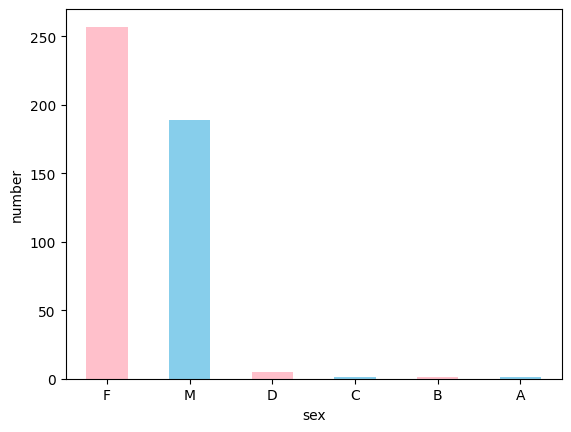

In [5]:
X_data['sex'].value_counts().plot(kind='bar', rot=0, xlabel='sex', ylabel='number',
                                   color=['pink', 'skyblue'])
plt.show()

## Характеристика: "Age"

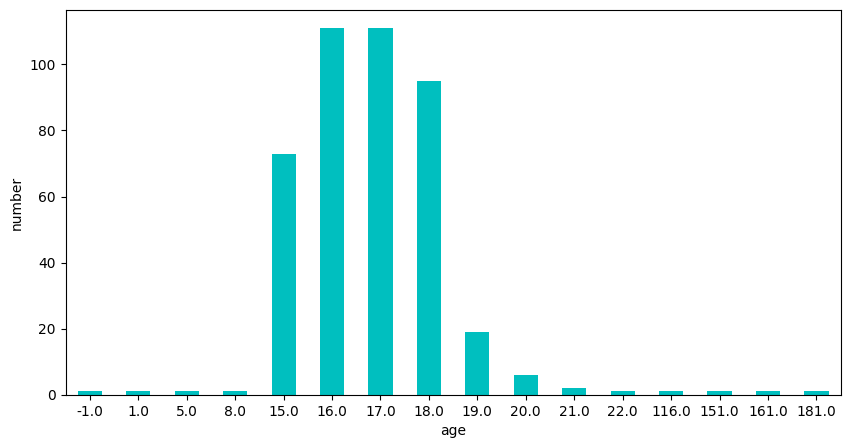

In [6]:
plt.figure(figsize=(10,5))
X_data['age'].value_counts().sort_index().plot(kind='bar', rot=0, xlabel='age', ylabel='number',color='c')
plt.show()

## Характеристика: "Weekly study time"

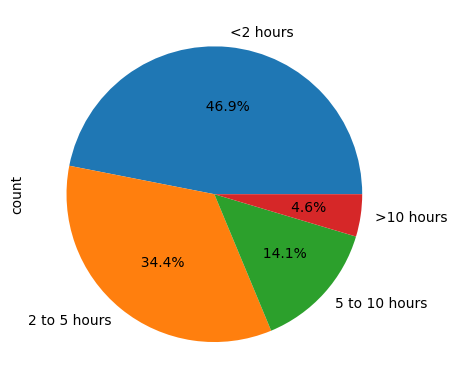

In [7]:
X_data['studytime'].value_counts().plot.pie(labels=['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours'],
                                            autopct='%6.1f%%')
plt.show()

In [8]:
# labels=[1, 2, 3, 4]
# h = [1, 3.5, 7.5, 25]
# h_s = 0
# for l in range(len(labels)):
#     h_s += len(X_data[X_data['studytime'] == labels[l]]) * h[l]
# h_s / len(X_data)

## Характеристика: "Romantic Relationship"

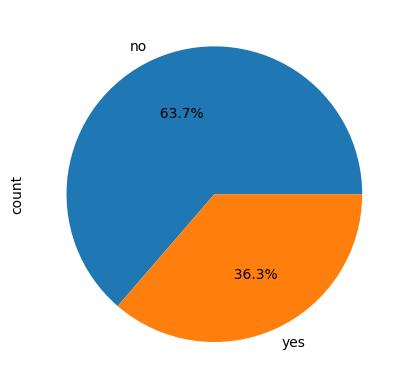

In [9]:
X_data['romantic'].value_counts().plot.pie(autopct='%6.1f%%')
plt.show()

## Характеристика: "Alcohol Consumption"

In [10]:
index = ['very high', 'high', 'moderate', 'low', 'very low']
workday = X_data['Dalc'].value_counts().to_list()
weekend = X_data['Walc'].value_counts().to_list()
alcohol = pd.DataFrame({'workday': workday, 'weekend': weekend}, index=index)
alcohol

,workday,weekend
very high,318,175
high,76,98
moderate,33,85
low,14,60
very low,13,36


## Целевая зависимость: "G3" (Final Grade)

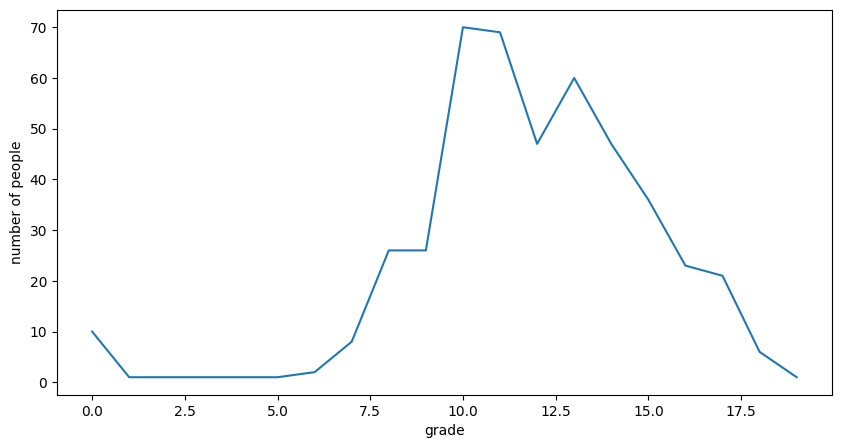

In [11]:
plt.figure(figsize=(10,5))
X_data['G3'].value_counts().sort_index().plot(kind='line', rot=0, xlabel='grade', ylabel='number of people')
plt.show()

## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:
- pieplot
- boxplot
- violinplot

## Характеристика: "traveltime"

<Axes: xlabel='address', ylabel='traveltime'>

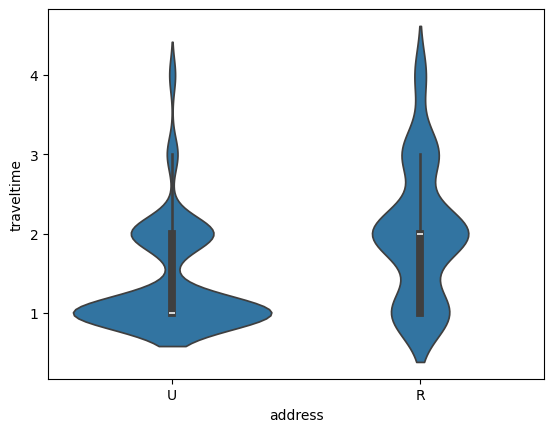

In [12]:
sns.violinplot(data=X_data, x="address", y="traveltime")

## Характеристика: "famrel"

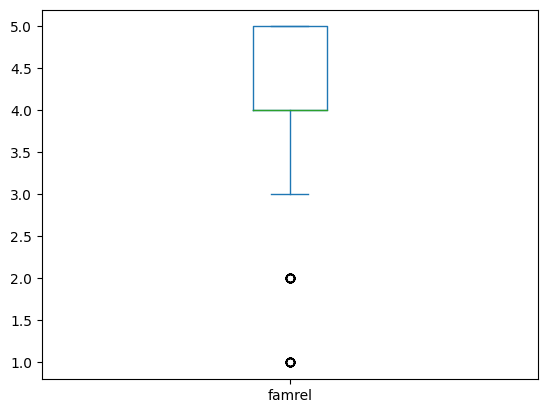

In [13]:
X_data['famrel'].plot(kind='box')
plt.show()

## Характеристика: "higher"

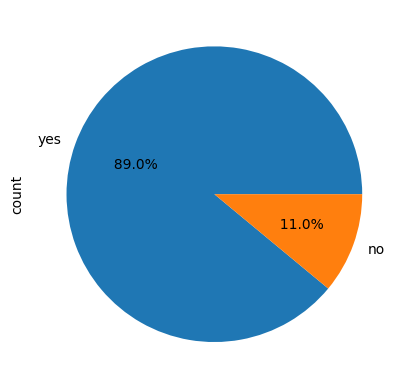

In [14]:
X_data['higher'].value_counts().plot.pie(autopct='%6.1f%%')
plt.show()

## Характеристика: "address"

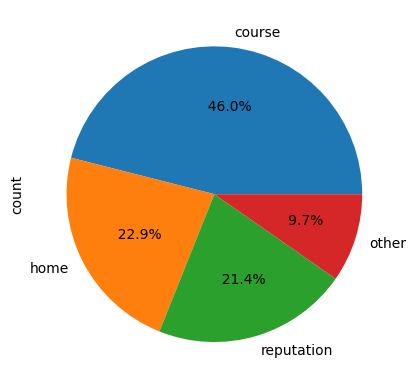

In [15]:
X_data['reason'].value_counts().plot.pie(autopct='%6.1f%%')
plt.show()

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.

Для большей информации запускать после кодирования категориальных признаков

In [29]:
X_data.corr().round(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
school,1.000,0.100,-0.077,-0.381,0.002,-0.053,0.294,0.223,-0.280,0.122,...,0.148,0.068,0.093,-0.077,0.071,0.120,-0.231,0.173,0.066,0.006
sex,0.100,1.000,-0.039,-0.040,0.148,0.046,0.129,0.066,0.020,-0.198,...,0.127,0.026,-0.054,0.060,0.030,0.008,0.058,-0.001,-0.042,-0.002
age,-0.077,-0.039,1.000,0.053,-0.020,-0.014,-0.126,-0.139,0.012,-0.010,...,-0.084,-0.113,0.102,-0.072,-0.068,-0.042,0.059,0.009,-0.040,0.380
address,-0.381,-0.040,0.053,1.000,-0.068,0.124,-0.216,-0.109,0.362,-0.089,...,-0.034,-0.084,0.032,-0.016,0.049,-0.146,0.112,-0.018,-0.056,0.040
famsize,0.002,0.148,-0.020,-0.068,1.000,-0.240,0.045,0.003,0.017,-0.035,...,0.018,0.048,0.038,-0.012,-0.120,0.028,-0.041,0.065,0.057,-0.035
Pstatus,-0.053,0.046,-0.014,0.124,-0.240,1.000,-0.074,-0.018,0.059,-0.057,...,0.041,-0.072,-0.055,0.113,-0.008,-0.072,0.046,-0.036,-0.064,-0.097
Medu,0.294,0.129,-0.126,-0.216,0.045,-0.074,1.000,0.650,-0.292,0.089,...,0.416,0.124,-0.077,-0.007,0.204,0.013,-0.065,0.169,0.114,-0.143
Fedu,0.223,0.066,-0.139,-0.109,0.003,-0.018,0.650,1.000,-0.211,0.078,...,0.286,0.197,-0.178,0.056,0.303,-0.034,-0.063,0.136,-0.049,-0.107
traveltime,-0.280,0.020,0.012,0.362,0.017,0.059,-0.292,-0.211,1.000,-0.084,...,-0.090,-0.074,0.060,-0.020,0.022,-0.158,0.121,-0.077,-0.075,0.072
studytime,0.122,-0.198,-0.010,-0.089,-0.035,-0.057,0.089,0.078,-0.084,1.000,...,0.015,0.107,0.008,-0.055,0.011,0.035,-0.121,0.130,0.019,0.048


## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты

Для большей информации запускать после кодирования категориальных признаков

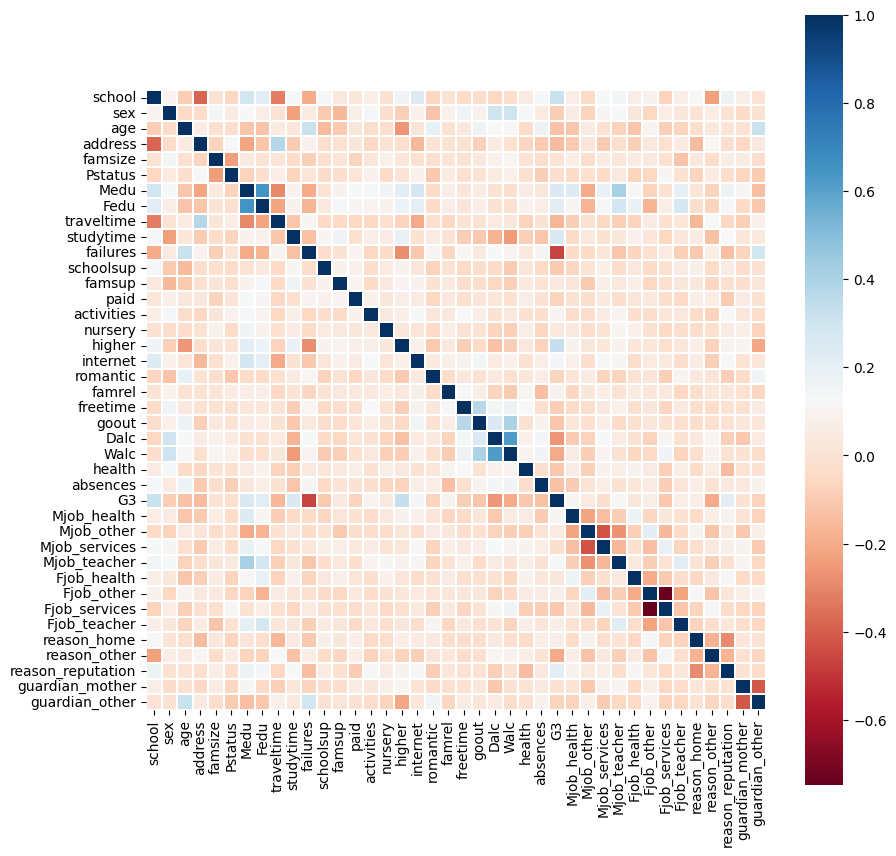

In [30]:
matr_spearman = X_data.corr(method='spearman').round(3)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matr_spearman, square=True, cmap="RdBu", linewidths= .3)
plt.show()

## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.

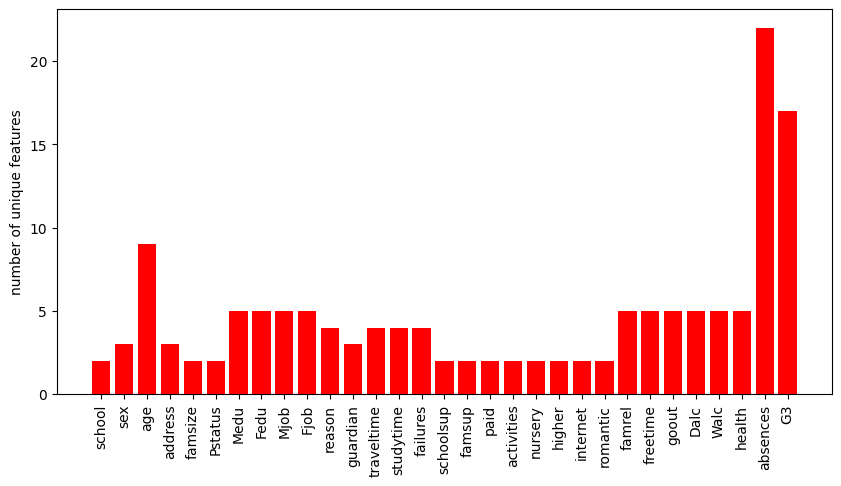

In [21]:
plt.figure(figsize=(10,5))
feature = X_data.columns
unique = [len(X_data[f].unique()) for f in feature]
plt.bar(feature, unique, color='r')
plt.xticks(rotation=90)
plt.ylabel("number of unique features")
plt.show()

## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме

#### Если взять за высокие оценки около 20 процентов от результатов учеников, то высокими считаются оценки начиня с 15 балов

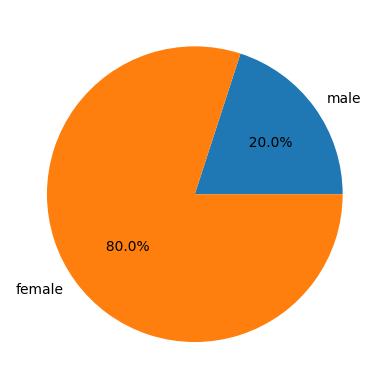

In [22]:
male = len(X_data[(X_data['G3']>14) & (X_data['sex']=='M') & (X_data['traveltime']>2)])
female = len(X_data[(X_data['G3']>14) & (X_data['sex']=='F') & (X_data['traveltime']>2)])
plt.pie([male, female], labels=['male', 'female'], autopct='%6.1f%%')
plt.show()

## Построить boxplot для оценок по возрасту.  

<Axes: xlabel='age', ylabel='G3'>

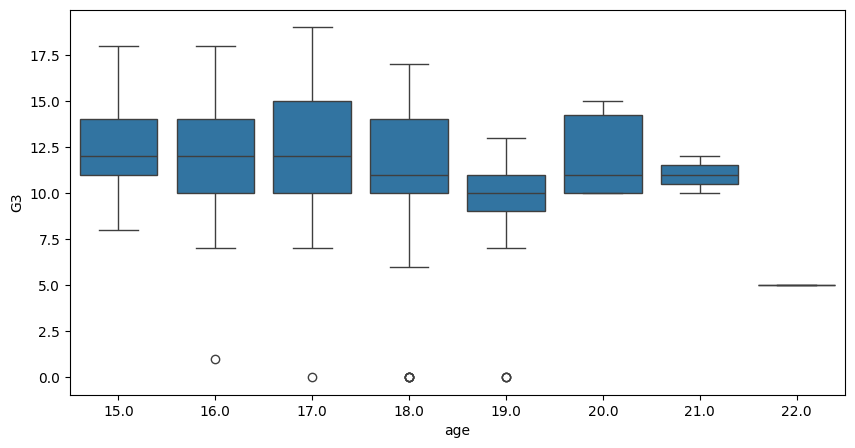

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x='age', y='G3', data=X_data[['age', 'G3']])

## Найти id топ-5 самых юных отличников.

In [24]:
X_data[X_data['G3'] > 14].sort_values('age')[:5].index.tolist()

[284, 441, 197, 200, 112]

## Для каждого возраста найдите максимальную и минимальную оценку (G3)

In [25]:
grade = X_data.groupby('age')['G3']
distribution = pd.DataFrame({'grade_max': grade.max(), 'grade_min': grade.min()})
distribution

,grade_max,grade_min
age,,
15.0,18,8
16.0,18,1
17.0,19,0
18.0,17,0
19.0,13,0
20.0,15,10
21.0,12,10
22.0,5,5


# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.

In [27]:
X_data.info()
X_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      454 non-null    object 
 1   sex         446 non-null    object 
 2   age         418 non-null    float64
 3   address     449 non-null    object 
 4   famsize     454 non-null    object 
 5   Pstatus     454 non-null    object 
 6   Medu        454 non-null    int64  
 7   Fedu        454 non-null    int64  
 8   Mjob        454 non-null    object 
 9   Fjob        454 non-null    object 
 10  reason      454 non-null    object 
 11  guardian    454 non-null    object 
 12  traveltime  454 non-null    int64  
 13  studytime   454 non-null    int64  
 14  failures    454 non-null    int64  
 15  schoolsup   454 non-null    object 
 16  famsup      454 non-null    object 
 17  paid        454 non-null    object 
 18  activities  454 non-null    object 
 19  nursery     454 non-null    o

school         0
sex            8
age           36
address        5
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G3             0
dtype: int64

## Найдите и исправьте ошибки в данных

In [17]:
X_data.loc[(X_data['age'] > 22) | (X_data['age'] < 15), 'age'] = np.nan
X_data.loc[(X_data['sex'] != 'F') & (X_data['sex'] != 'M'), 'sex'] = np.nan

## Удалите скоррелированные данные

## Заполните пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

In [ ]:
# X_train.loc[X_train['traveltime'] < 3, 'address'] = 'U'
# X_train.loc[X_train['traveltime'] > 2, 'address'] = 'R'
# X_train['age'].fillna(X_train['age'].median(), inplace=True)
# X_train = X_train.dropna(subset=['sex'])

## Закодируйте категориальные признаки

In [28]:
X_data['sex'] = X_data['sex'].map({'F':0, 'M':1})
X_data['school'] = X_data['school'].map({'MS':0, 'GP':1})
X_data['address'] = X_data['address'].map({'U':0, 'R':1})
X_data = pd.get_dummies(X_data, columns=['Mjob', 'Fjob', 'reason', 'guardian'], drop_first= True)
index = X_data.dtypes[X_data.dtypes == 'O'].index.to_list()
for ind in index: X_data[ind] = LabelEncoder().fit_transform(X_data[ind])

## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.

In [31]:
X_data['Weekalc'] = list(map(int, round((X_data['Dalc'] * 5 + X_data['Walc'] * 2) / 7)))
X_data.drop(columns=['Dalc', 'Walc'], inplace=True)
X_data['Pedu'] = X_data['Fedu'] * X_data['Medu']
X_data.drop(columns=['Fedu', 'Medu'], inplace=True)

# Часть 3. Стратегия валидации

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

In [32]:
X = X_data.drop(['G3'], axis=1)
y = X_data['G3']

## Разделите данные и объясните выбор стратегии

Разделили данные на обучающие(для обучения модели и выбора лучших гиперпараметров с помощью кросс-валидации) и тестовые(для проверки качества модели) в соотношении 80, 20 процентов.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Часть 4. Заполнение пропусков в данных

## Фильтрация по диапазону значений

Проверьте, что все характеристики принадлежат тому диапазону значений, который приведен в описании к исходным данным. Например, если в графе "Пол" есть значение FF, P или -1, то это явная ошибка заполнения.

Приведите данные в соответствии с описанием данных. Если значение указано неверно - укажите ```NaN```.

Привели выше

## Адаптивное заполнения пропусков

Реализуйте стратегию заполнения пропусков данных на основе схожих примеров. Обучите один из известных вам алгоритмов (knn, Naive Bayes, linear regression) для предсказания той характеристики, пропуски которой присутсвуют в данных. В качестве характеристики для обучения алгоритмов __нельзя__ использовать ```G3```.

In [34]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
imputer = KNNImputer(n_neighbors=7)
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Часть 5. Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

In [36]:
y_pred = {}
mse = {}

## KNN

In [37]:
knn = KNeighborsRegressor()
hyperparams = {
    'n_neighbors': range(1, 100),
    'p': [1, 2]
}
cross_val = GridSearchCV(knn, hyperparams, cv=9, scoring='neg_mean_squared_error')
cross_val.fit(X_train, y_train)
print(cross_val.best_params_)
print('best score ', cross_val.best_score_)
y_pred['knn'] = cross_val.predict(X_test)
mse['knn'] = round(mean_squared_error(y_test, y_pred['knn']), 3)
print('MSE', mse['knn'])

{'n_neighbors': 28, 'p': 1}
best score  -8.124888868148885
MSE 10.196


## Bayes

In [38]:
nb = MultinomialNB()
hyperparams = {
    'alpha': [1.0e-10, 0.4, 0.8, 1, 1.2],
    'fit_prior': [True, False]
}
cross_val = GridSearchCV(nb, hyperparams, cv=5, scoring='neg_mean_squared_error')
cross_val.fit(X_train, y_train)
print(cross_val.best_params_)
print('best score ', cross_val.best_score_)
y_pred['nb'] = cross_val.predict(X_test)
mse['nb'] = round(mean_squared_error(y_test, y_pred['nb']), 3)
print('MSE', mse['nb'])

{'alpha': 1.2, 'fit_prior': True}
best score  -8.70289193302892
MSE 9.747


## Регрессия

In [39]:
lr = LinearRegression()
cross_val = GridSearchCV(lr, {}, cv=9, scoring='neg_mean_squared_error')
cross_val.fit(X_train, y_train)
print('best score ', cross_val.best_score_)
y_pred['lr'] = cross_val.predict(X_test).astype('int')
mse['lr'] = round(mean_squared_error(y_test, y_pred['lr']), 3)
print('MSE', mse['lr'])

best score  -7.0586582377436695
MSE 9.89


## SVM

In [41]:
svm = SVR()
hyperparams = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': np.arange(0.5, 2, 0.1),
    'gamma': ['scale', 'auto'],
}
cross_val = GridSearchCV(svm, hyperparams, cv=5, scoring='neg_mean_squared_error')
cross_val.fit(X_train, y_train)
print(cross_val.best_params_)
y_pred['svm'] = cross_val.predict(X_test)
mse['svm'] = round(mean_squared_error(y_test, y_pred['svm']), 3)
print('MSE', mse['svm'])

{'C': 0.6, 'gamma': 'scale', 'kernel': 'linear'}
MSE 8.73


## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность

Вариант 1. Нужно взвесить предсказания простых моделей. Предложите метод взвешивания.

In [42]:
mse

{'knn': 10.196, 'nb': 9.747, 'lr': 9.89, 'svm': 8.73}

In [43]:
pr = (y_pred['knn'] + y_pred['nb'] * 2 + y_pred['lr'] * 2 + y_pred['svm']*3) // 8

In [45]:
print('mse ', round(mean_squared_error(y_test, pr), 3))

mse  8.934


Вариант 2. Нужно оценить корреляцию предсказаний простых моделей.

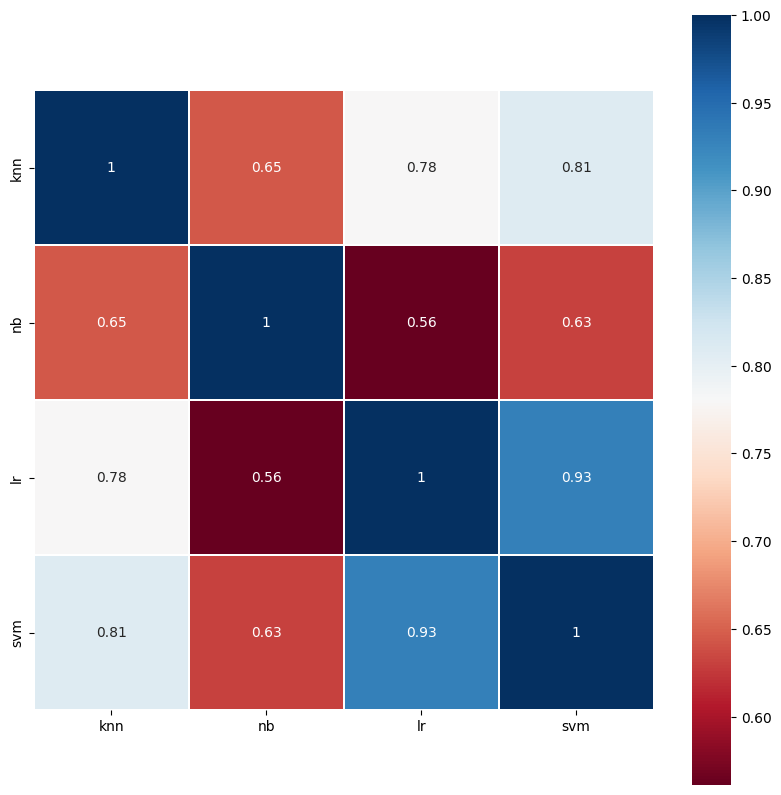

In [46]:
matr_spearman = pd.DataFrame(y_pred).corr(method='spearman').round(3)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matr_spearman, square=True, cmap="RdBu", linewidths= .3, annot=True)
plt.show()

## Сделайте итоговое предсказание

Решением домашнего задания является данный ноутбук + .csv файл с предсказанием. Пример формата файла, который должен у вас получится приведен в ```data/sample_submission.csv```. Данные для предсказания - ```X_test.csv```.

За лучшее предсказание 5 человек получат +10% к домашке.

Значения предсказаний должны быть целочисленными. Проверка будет точности решения будет по MSE.

In [48]:
X_test = pd.read_csv('X_test.csv')

X_test['sex'] = X_test['sex'].map({'F':0, 'M':1})
X_test['school'] = X_test['school'].map({'MS':0, 'GP':1})
X_test['address'] = X_test['address'].map({'U':0, 'R':1})
X_test = pd.get_dummies(X_test, columns=['Mjob', 'Fjob', 'reason', 'guardian'], drop_first= True)
index = X_test.dtypes[X_test.dtypes == 'O'].index.to_list()
for ind in index: X_test[ind] = LabelEncoder().fit_transform(X_test[ind])

X_test['Weekalc'] = list(map(int, round((X_test['Dalc'] * 5 + X_test['Walc'] * 2) / 7)))
X_test.drop(columns=['Dalc', 'Walc'], inplace=True)
X_test['Pedu'] = X_test['Fedu'] * X_test['Medu']
X_test.drop(columns=['Fedu', 'Medu'], inplace=True)

In [49]:
X_data.dropna(inplace=True)
X = X_data.drop(['G3'], axis=1)
y = X_data['G3']

In [50]:
scaler = MinMaxScaler()
scaler.fit(X)
X_data = pd.DataFrame(scaler.transform(X), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [51]:
models = [KNeighborsRegressor(n_neighbors=28, p=1),
          MultinomialNB(alpha=1.2, fit_prior=True),
          LinearRegression(),
          SVR(C=0.6, gamma='scale', kernel='linear')]
pred = []
for m in models:
    m.fit(X_data, y)
    pred.append(m.predict(X_test))

In [52]:
G3_pred = (np.array([0.2, 0.25, 0.25, 0.3]) @ np.array(pred)).round().astype('int')

In [ ]:
submission = pd.read_csv('sample_submission.csv', index_col='id')
submission['G3'] = G3_pred # ваше предсказание
submission.to_csv('submission.csv', index=False)

# Часть 6. Состязательная валидация (Adversarial Validation)

Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм возможно только на заданном тренировочном наборе данных, а результат требуется к набору, для которого нет ответов, то выбирают следующий подход:
- оценить степень схожести тренировочных и тестовых данных;
- составить валидацию из тех тренировочных данных, которые больше похожи на тестовые.

Алгоритм реализации AV:
1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (```is_test```) для классов: тренировочные данные и тестовые.
То есть у тестовых данных будет значение ```is_test = 1```, а у тренировочных ```is_test = 0```.
4. Учим алгоритм классификации предсказывать заданную метку ```is_test```.
5. Делим тренировочные данные на N частей и проводим кросс-валидацию.

Обучаем N алгоритмов классификации: каждый обучается на всех тестовых данных и на N-1 наборах тренировочных. Предсказываем на 1 тренировочном наборе.

6. Для каждого элемента в выборке предсказываем вероятность принадлежности класса и сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Выделяем заданное число данных в валидацию.
8. Обучаемся для итогового предсказания на всех данных.

In [53]:
X_data['is_test'] = 0
X_test['is_test'] = 1

In [54]:
y_train = X_data['is_test']
X_train = X_data.drop(['is_test'], axis=1)
y_test = X_test['is_test']
X_test = X_test.drop(['is_test'], axis=1)

In [55]:
N = 20

In [59]:
acc = []
cv = StratifiedKFold(n_splits = N, shuffle=True)
df, tar = pd.concat([X_train, X_test], ignore_index=True), pd.concat([y_train, y_test], ignore_index=True)
for neighbors in range(1, N+1):
    acc_sum = 0
    knn = KNeighborsClassifier(neighbors)
    for train_index, test_index in cv.split(df, tar):
        knn.fit(df.iloc[train_index], tar.iloc[train_index])
        predict = knn.predict(df.iloc[test_index])
        acc_sum += accuracy_score(predict, tar.iloc[test_index])
    acc.append([acc_sum / N, neighbors])

In [60]:
sorted(acc, reverse=True)[0]

[0.6716666666666665, 10]

In [61]:
pred = {}
cv = StratifiedKFold(n_splits = N)
knn = KNeighborsClassifier(10)
for train_index, test_index in cv.split(X_train, y_train):
    knn.fit(pd.concat([X_train.loc[train_index].reset_index(drop=True), X_test], ignore_index=True),
            pd.concat([y_train.loc[train_index].reset_index(drop=True), y_test], ignore_index=True))
    predict = knn.predict_proba(X_train.loc[test_index])[:,1]
    pred.update(zip(test_index, predict))

In [62]:
val_ind = list(map(lambda v: v[0], sorted(pred.items(), key=lambda item: item[1], reverse=True)[:81]))

In [63]:
X_val = X_train.loc[sorted(val_ind)]
y_train = y.reset_index(drop=True)
y_val = y_train[X_val.index]

In [64]:
y_train = y_train.drop(labels = sorted(val_ind),axis = 0)

In [65]:
X_train = X_train.drop(labels = sorted(val_ind),axis = 0)

In [66]:
y_pred = {}
mse = {}

## KNN

In [68]:
knn = KNeighborsRegressor()
hyperparams = {
    'n_neighbors': range(1, 100),
    'p': [1, 2]
}
cross_val = GridSearchCV(knn, hyperparams, cv=9, scoring='neg_mean_squared_error')
cross_val.fit(X_train, y_train)
print(cross_val.best_params_)
print('best score ', cross_val.best_score_)
y_pred['knn'] = cross_val.predict(X_val)
mse['knn'] = round(mean_squared_error(y_val, y_pred['knn']), 3)
print('MSE', mse['knn'])

{'n_neighbors': 27, 'p': 1}
best score  -8.103291334315568
MSE 8.981


## Bayes

In [69]:
nb = MultinomialNB()
hyperparams = {
    'alpha': [1.0e-10, 0.4, 0.8, 1, 1.2],
    'fit_prior': [True, False]
}
cross_val = GridSearchCV(nb, hyperparams, cv=5, scoring='neg_mean_squared_error')
cross_val.fit(X_train, y_train)
print(cross_val.best_params_)
print('best score ', cross_val.best_score_)
y_pred['nb'] = cross_val.predict(X_val)
mse['nb'] = round(mean_squared_error(y_val, y_pred['nb']), 3)
print('MSE', mse['nb'])

{'alpha': 1, 'fit_prior': True}
best score  -8.612019230769231
MSE 11.309


## Регрессия

In [70]:
lr = LinearRegression()
cross_val = GridSearchCV(lr, {}, cv=9, scoring='neg_mean_squared_error')
cross_val.fit(X_train, y_train)
print('best score ', cross_val.best_score_)
y_pred['lr'] = cross_val.predict(X_val).astype('int')
mse['lr'] = round(mean_squared_error(y_val, y_pred['lr']), 3)
print('MSE', mse['lr'])

best score  -7.2466727905822905
MSE 10.309


## SVM

In [71]:
svm = SVR()
hyperparams = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': np.arange(0.5, 2, 0.1),
    'gamma': ['scale', 'auto'],
}
cross_val = GridSearchCV(svm, hyperparams, cv=5, scoring='neg_mean_squared_error')
cross_val.fit(X_train, y_train)
print(cross_val.best_params_)
y_pred['svm'] = cross_val.predict(X_val)
mse['svm'] = round(mean_squared_error(y_val, y_pred['svm']), 3)
print('MSE', mse['svm'])

{'C': 0.6, 'gamma': 'scale', 'kernel': 'linear'}
MSE 9.033


In [72]:
mse

{'knn': 8.981, 'nb': 11.309, 'lr': 10.309, 'svm': 9.033}